### MNIST Dataset - Applying MLPClassifer for it.

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [53]:
train_df = pd.read_csv("MNIST/mnist_train.csv")

In [54]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test_df = pd.read_csv("MNIST/mnist_test.csv")
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_Train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]


In [57]:
X_Train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [59]:
X_Test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [60]:
X_Test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y_test.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [62]:
#Normalizing the values before applying the model
from sklearn.preprocessing import Normalizer
norm = Normalizer(norm="max")


In [63]:
norm.fit(X_Train)

Normalizer(norm='max')

In [64]:
X_Train_Transformed = norm.transform(X_Train)

In [65]:
X_Test_Transformed = norm.transform(X_Test)

In [66]:
X_Train_Transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
model = MLPClassifier(
    hidden_layer_sizes=(10,10),
    activation="relu",
    solver="adam",
    random_state=48,
    max_iter=1800,
    learning_rate_init=0.0001,
    early_stopping=True,
    validation_fraction=0.4
)

In [68]:
model.fit(X_Train_Transformed,y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
              learning_rate_init=0.0001, max_iter=1800, random_state=48,
              validation_fraction=0.4)

In [69]:
y_predict = model.predict(X_Test_Transformed)

In [70]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [79]:
accuracy_score(y_test,y_predict)

0.9293

In [72]:
y_predict_check = pd.DataFrame(y_predict)
y_predict_check

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [73]:
#Plotting the curves and classification report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import(accuracy_score,classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve)

In [74]:
precision = precision_score(y_true=y_test,y_pred=y_predict,average='macro')
recall = recall_score(y_true=y_test,y_pred=y_predict,average='macro')
f1 = f1_score(y_true=y_test,y_pred=y_predict,average='macro')
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1}")
print(f"Confusion Matrix : {confusion_matrix(y_true=y_test,y_pred=y_predict)}")

Precision : 0.9285480387069782
Recall : 0.9286285202911543
F1 Score : 0.9284913218166855
Confusion Matrix : [[ 951    0    4    1    0    8    8    5    3    0]
 [   0 1112    5    2    1    1    3    2    9    0]
 [   9    7  935   19    8    3   11    9   28    3]
 [   3    3   13  913    2   31    1    5   33    6]
 [   0    2    5    1  930    0   10    1    3   30]
 [   6    1    2   29    3  810   15    9   11    6]
 [  15    3    7    0   14   19  894    0    6    0]
 [   2   14   25    4    7    2    0  938    0   36]
 [   5    4    6   20    8    9   22    7  886    7]
 [   8    7    0   11   34    8    0   10    7  924]]


In [75]:
print(classification_report(y_true=y_test,y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.95      0.94       982
           5       0.91      0.91      0.91       892
           6       0.93      0.93      0.93       958
           7       0.95      0.91      0.93      1028
           8       0.90      0.91      0.90       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [77]:
#Plotting ROC curve
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y=y_test,classes=np.unique(y_train))
y_scores = model.predict_proba(X=X_Test)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [81]:
y_scores_df = pd.DataFrame(y_scores)
y_scores_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.0,0.000000e+00,0.0
1,0.0,0.0,1.0,1.105032e-154,0.0,0.0,0.0,0.0,0.000000e+00,0.0
2,0.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0
3,1.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0
4,0.0,0.0,0.0,0.000000e+00,1.0,0.0,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0
9996,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0
9997,0.0,0.0,0.0,0.000000e+00,1.0,0.0,0.0,0.0,0.000000e+00,0.0
9998,0.0,0.0,0.0,0.000000e+00,0.0,1.0,0.0,0.0,1.533753e-243,0.0


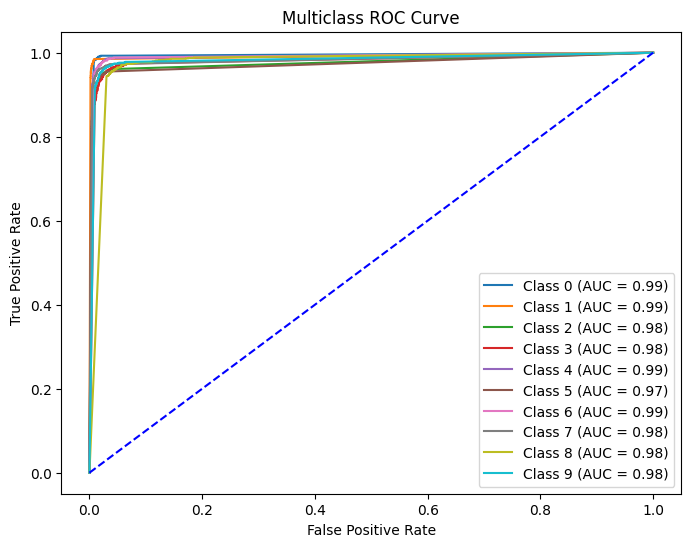

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_scores[:,i])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'Class {i} (AUC = {roc_auc:.2f})')
#Plotting diagonal line
plt.plot([0,1],[0,1],color='blue',linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")   